# Test training and inference of detection models with custom modules 

### Setup

Install required libraries

In [1]:
# # !pip install ultralytics==8.0.20
!pip install -e .

Obtaining file:///C:/Users/admin/PycharmProjects/ultralytics
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for ultralytics (pyproject.toml): started
  Building editable for ultralytics (pyproject.toml): finished with status 'done'
  Created wheel for ultralytics: filename=ultralytics-8.3.18-0.editable-py3-none-any.whl size=22886 sha256=293d535b235f981f4c436551c82af7a90c90a219efeef259e958547eed9887be
  Stored in directory: C:\Users\admin\AppData\Local\Temp\pip-ephem-wheel-cache-2pn4ow3u\wheels\05\0e\7f\672aeb8320196e28ad1ed07


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Uncomment below in case you need to check architecture compatability with specific opset of onnx.

In [2]:
# !pip install onnx

Import required libraries

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.18  Python-3.11.1 torch-2.5.0+cpu CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)
Setup complete  (8 CPUs, 13.9 GB RAM, 352.7/476.4 GB disk)


In [4]:
import os
import glob

from IPython.display import display, Image

In [5]:
EXPERIMENTS_FOLDER = ""

DATASET_FOLDER = f"test_dataset"

os.makedirs(DATASET_FOLDER, exist_ok=True)

MODEL_NAME_TO_USE = "yolov8_res_cbam"
MODEL_TO_USE = f"{MODEL_NAME_TO_USE}.yaml"

RUNS_FOLDER = "runs/test_custom_detect_modules"
EXPERIMENT_NAME = f"{MODEL_NAME_TO_USE}_1_epoch"


TRAIN_EXPERIMENT_NAME = f"{EXPERIMENT_NAME}/train"
TRAINED_MODEL_PATH = f"{RUNS_FOLDER}/{TRAIN_EXPERIMENT_NAME}/weights/best.pt"


VAL_EXPERIMENT_NAME = f"{EXPERIMENT_NAME}/val"
TEST_EXPERIMENT_NAME = f"{EXPERIMENT_NAME}/test"

# Define variables to the experiment folders where predictions will be stored
INFERENCE_TRAIN_EXPERIMENT_NAME = f"{TRAIN_EXPERIMENT_NAME}_predict"
INFERENCE_VAL_EXPERIMENT_NAME = f"{VAL_EXPERIMENT_NAME}_predict"
INFERENCE_TEST_EXPERIMENT_NAME = f"{TEST_EXPERIMENT_NAME}_predict"

# Define path variables to predicted images that you saved
TRAIN_PREDICTIONS_PATH = f"{RUNS_FOLDER}/{INFERENCE_TRAIN_EXPERIMENT_NAME}"
VAL_PREDICTIONS_PATH = f"{RUNS_FOLDER}/{INFERENCE_VAL_EXPERIMENT_NAME}"
TEST_PREDICTIONS_PATH = f"{RUNS_FOLDER}/{INFERENCE_TEST_EXPERIMENT_NAME}"

# Define format and path for model export
FORMAT = "onnx"
EXPORT_EXPERIMENT_NAME = f"{EXPERIMENT_NAME}/{FORMAT}"


# Define number of epochs for training and image size
EPOCHS = 1
IMAGE_SIZE = 640

In [6]:
%cd {DATASET_FOLDER}

C:\Users\admin\PycharmProjects\ultralytics\test_dataset


C:\Users\admin\PycharmProjects\ultralytics\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Train YOLOv8

Train the model and evaluate its performance metrics on train subset to gain insights into its effectiveness

In [7]:
!yolo task=detect mode=train model="{MODEL_TO_USE}" data="{DATASET_FOLDER}/data.yaml" epochs="{EPOCHS}" imgsz="{IMAGE_SIZE}" plots=True project="{RUNS_FOLDER}" name="{TRAIN_EXPERIMENT_NAME}"


train: Scanning C:\Users\admin\PycharmProjects\ultralytics\test_dataset\train\labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|##########| 70/70 [00:00<?, ?it/s]
train: Scanning C:\Users\admin\PycharmProjects\ultralytics\test_dataset\train\labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|##########| 70/70 [00:00<?, ?it/s]

val: Scanning C:\Users\admin\PycharmProjects\ultralytics\test_dataset\valid\labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|##########| 20/20 [00:00<?, ?it/s]
val: Scanning C:\Users\admin\PycharmProjects\ultralytics\test_dataset\valid\labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|##########| 20/20 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]
        1/1         0G      3.366      4.608      4.244        101        640:   0%|          | 0/5 [00:24<?, ?it/s]
        1/1         0G      3.366      4.608      4.244        101        640:  20%|##        | 1/5 [00:24<01:39, 24.90s/it]
        1/1         0G      3.524    

WARNING вљ пёЏ no model scale passed. Assuming scale='n'.
Ultralytics 8.3.18 рџљЂ Python-3.11.1 torch-2.5.0+cpu CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)
engine\trainer: task=detect, mode=train, model=yolov8_res_cbam.yaml, data=test_dataset/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/test_custom_detect_modules, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

### Calculate metrics for validation and test subsets

Assess metrics on `val` subset

In [8]:
!yolo task=detect mode=val model="{TRAINED_MODEL_PATH}" data="{DATASET_FOLDER}/data.yaml" project="{RUNS_FOLDER}"  name="{VAL_EXPERIMENT_NAME}"

Ultralytics 8.3.18 рџљЂ Python-3.11.1 torch-2.5.0+cpu CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)
YOLOv8_res_cbam summary: 244 layers, 5,494,753 parameters, 0 gradients, 21.8 GFLOPs
                   all         20         65   0.000202      0.167    0.00052    5.2e-05
                  head          3         18          0          0          0          0
                helmet         17         45          0          0          0          0
                person          1          2   0.000606        0.5    0.00156   0.000156
Speed: 2.2ms preprocess, 167.4ms inference, 0.0ms loss, 25.4ms postprocess per image
Results saved to runs\test_custom_detect_modules\yolov8_res_cbam_1_epoch\val
рџ’Ў Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\admin\PycharmProjects\ultralytics\test_dataset\valid\labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|##########| 20/20 [00:00<?, ?it/s]
val: Scanning C:\Users\admin\PycharmProjects\ultralytics\test_dataset\valid\labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|##########| 20/20 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|#####     | 1/2 [00:02<00:02,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 2/2 [00:04<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 2/2 [00:04<00:00,  2.03s/it]


Assess metrics on `test` subset

In [9]:
!yolo task=detect mode=val model="{TRAINED_MODEL_PATH}" data="{DATASET_FOLDER}/test_data.yaml" project="{RUNS_FOLDER}" name="{TEST_EXPERIMENT_NAME}"

Ultralytics 8.3.18 рџљЂ Python-3.11.1 torch-2.5.0+cpu CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)
YOLOv8_res_cbam summary: 244 layers, 5,494,753 parameters, 0 gradients, 21.8 GFLOPs
                   all         10         58          0          0          0          0
Speed: 2.2ms preprocess, 191.9ms inference, 0.0ms loss, 40.3ms postprocess per image
Results saved to runs\test_custom_detect_modules\yolov8_res_cbam_1_epoch\test
рџ’Ў Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\admin\PycharmProjects\ultralytics\test_dataset\test\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|##########| 10/10 [00:00<?, ?it/s]
val: Scanning C:\Users\admin\PycharmProjects\ultralytics\test_dataset\test\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|##########| 10/10 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:02<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:02<00:00,  2.43s/it]


In [10]:
!yolo task=detect mode=val model="{TRAINED_MODEL_PATH}" data="{DATASET_FOLDER}/test_data.yaml" project="{RUNS_FOLDER}" name="{TEST_EXPERIMENT_NAME}"

Ultralytics 8.3.18 рџљЂ Python-3.11.1 torch-2.5.0+cpu CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)
YOLOv8_res_cbam summary: 244 layers, 5,494,753 parameters, 0 gradients, 21.8 GFLOPs
                   all         10         58          0          0          0          0
Speed: 2.0ms preprocess, 198.9ms inference, 0.0ms loss, 39.9ms postprocess per image
Results saved to runs\test_custom_detect_modules\yolov8_res_cbam_1_epoch\test2
рџ’Ў Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\admin\PycharmProjects\ultralytics\test_dataset\test\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|##########| 10/10 [00:00<?, ?it/s]
val: Scanning C:\Users\admin\PycharmProjects\ultralytics\test_dataset\test\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|##########| 10/10 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:02<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|##########| 1/1 [00:02<00:00,  2.48s/it]


### Visualize metrics

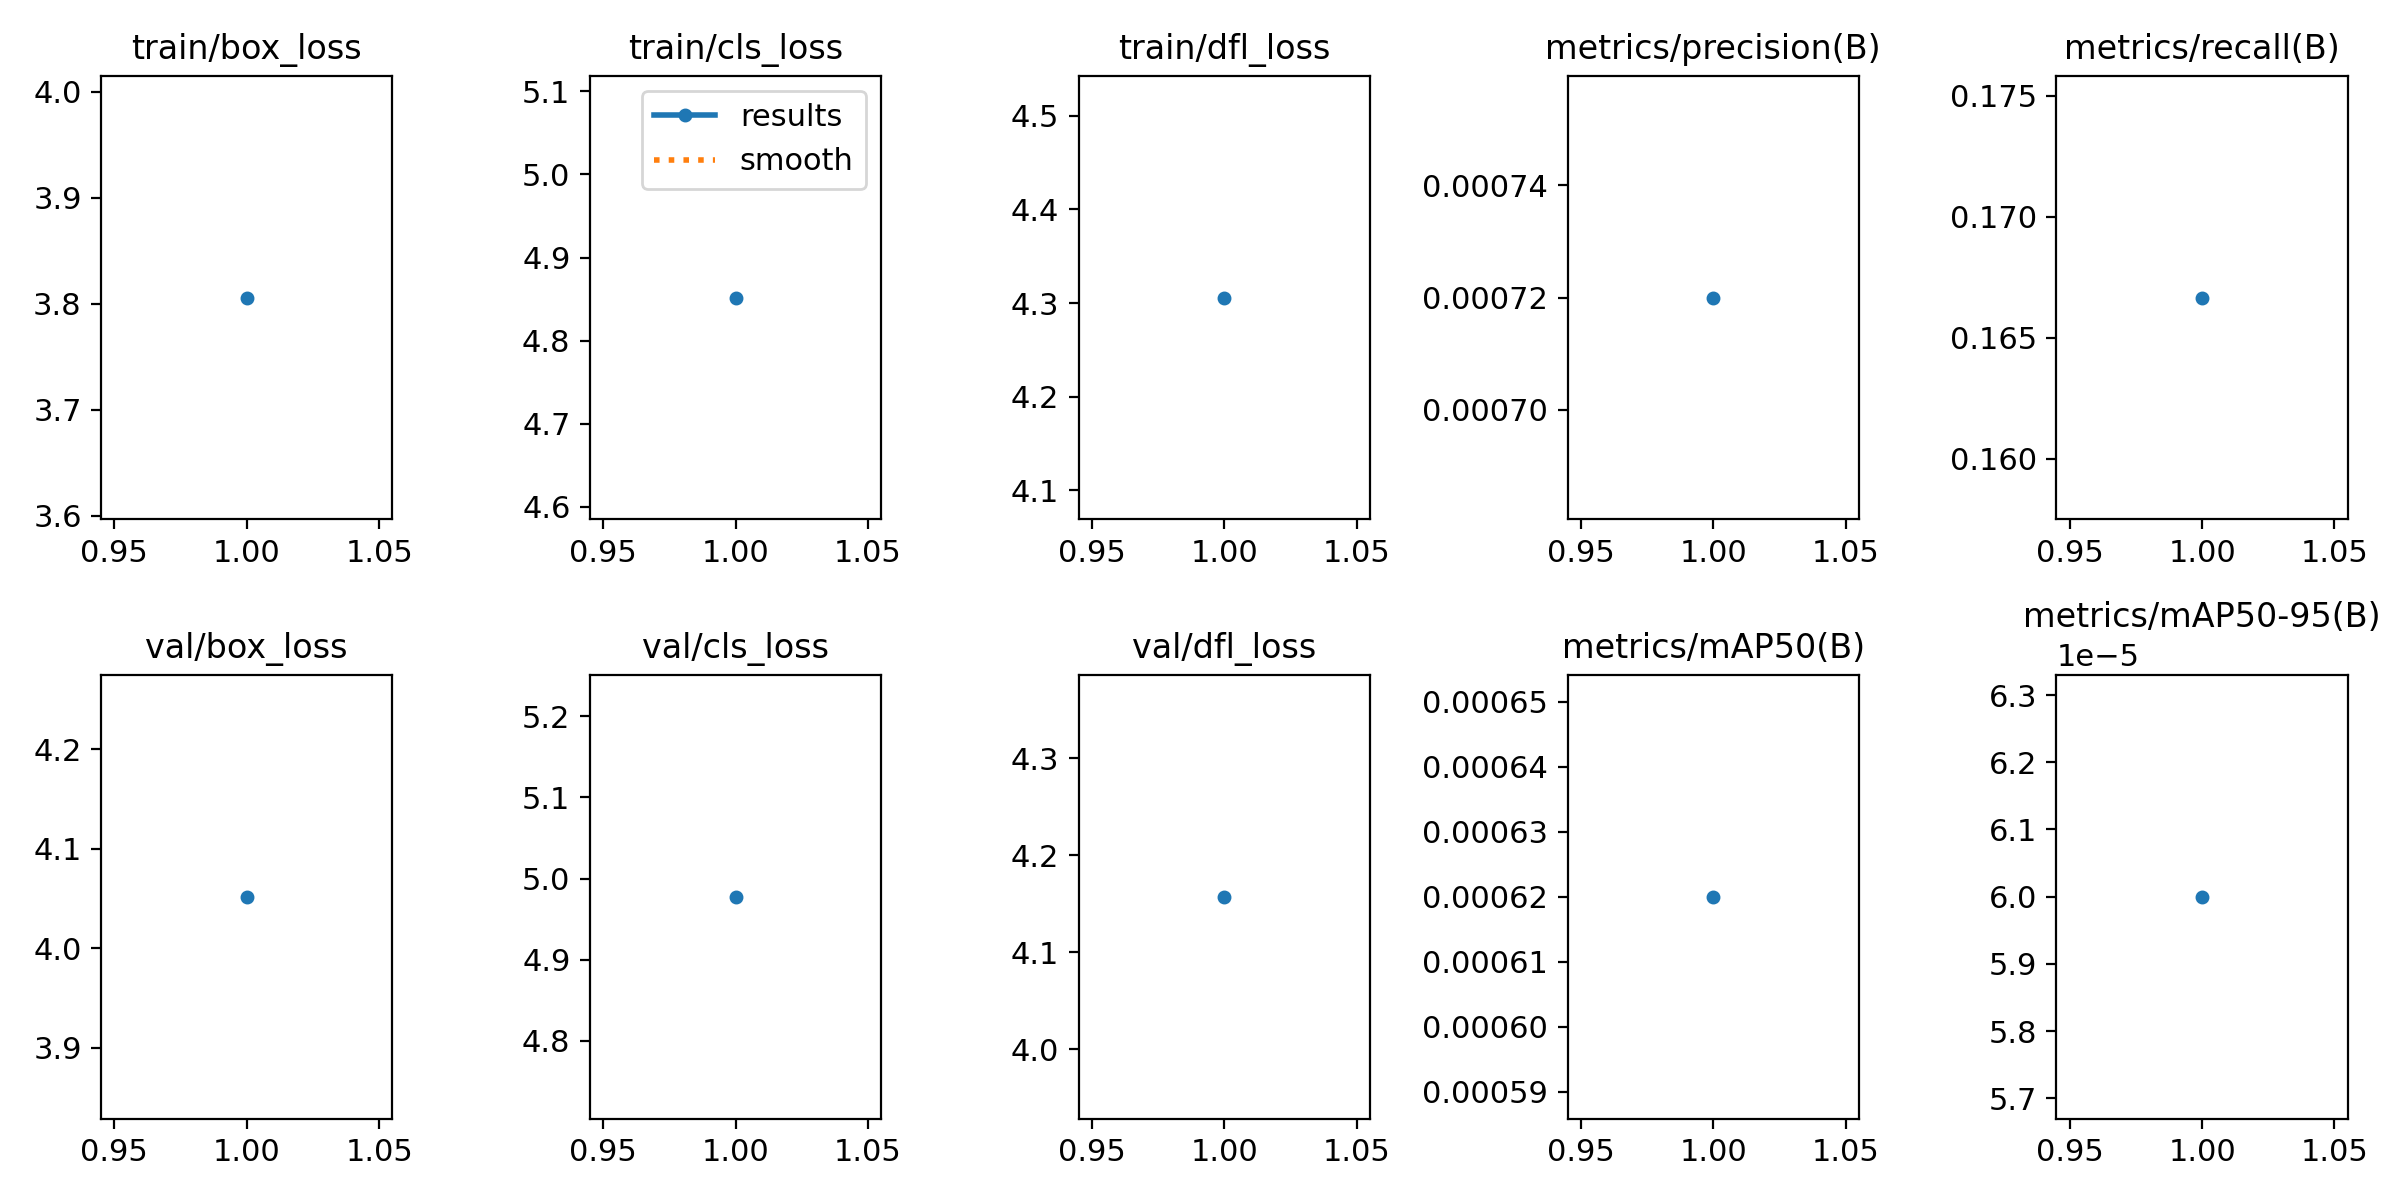

In [11]:
Image(filename=f"{RUNS_FOLDER}/{TRAIN_EXPERIMENT_NAME}/results.png", width=600)

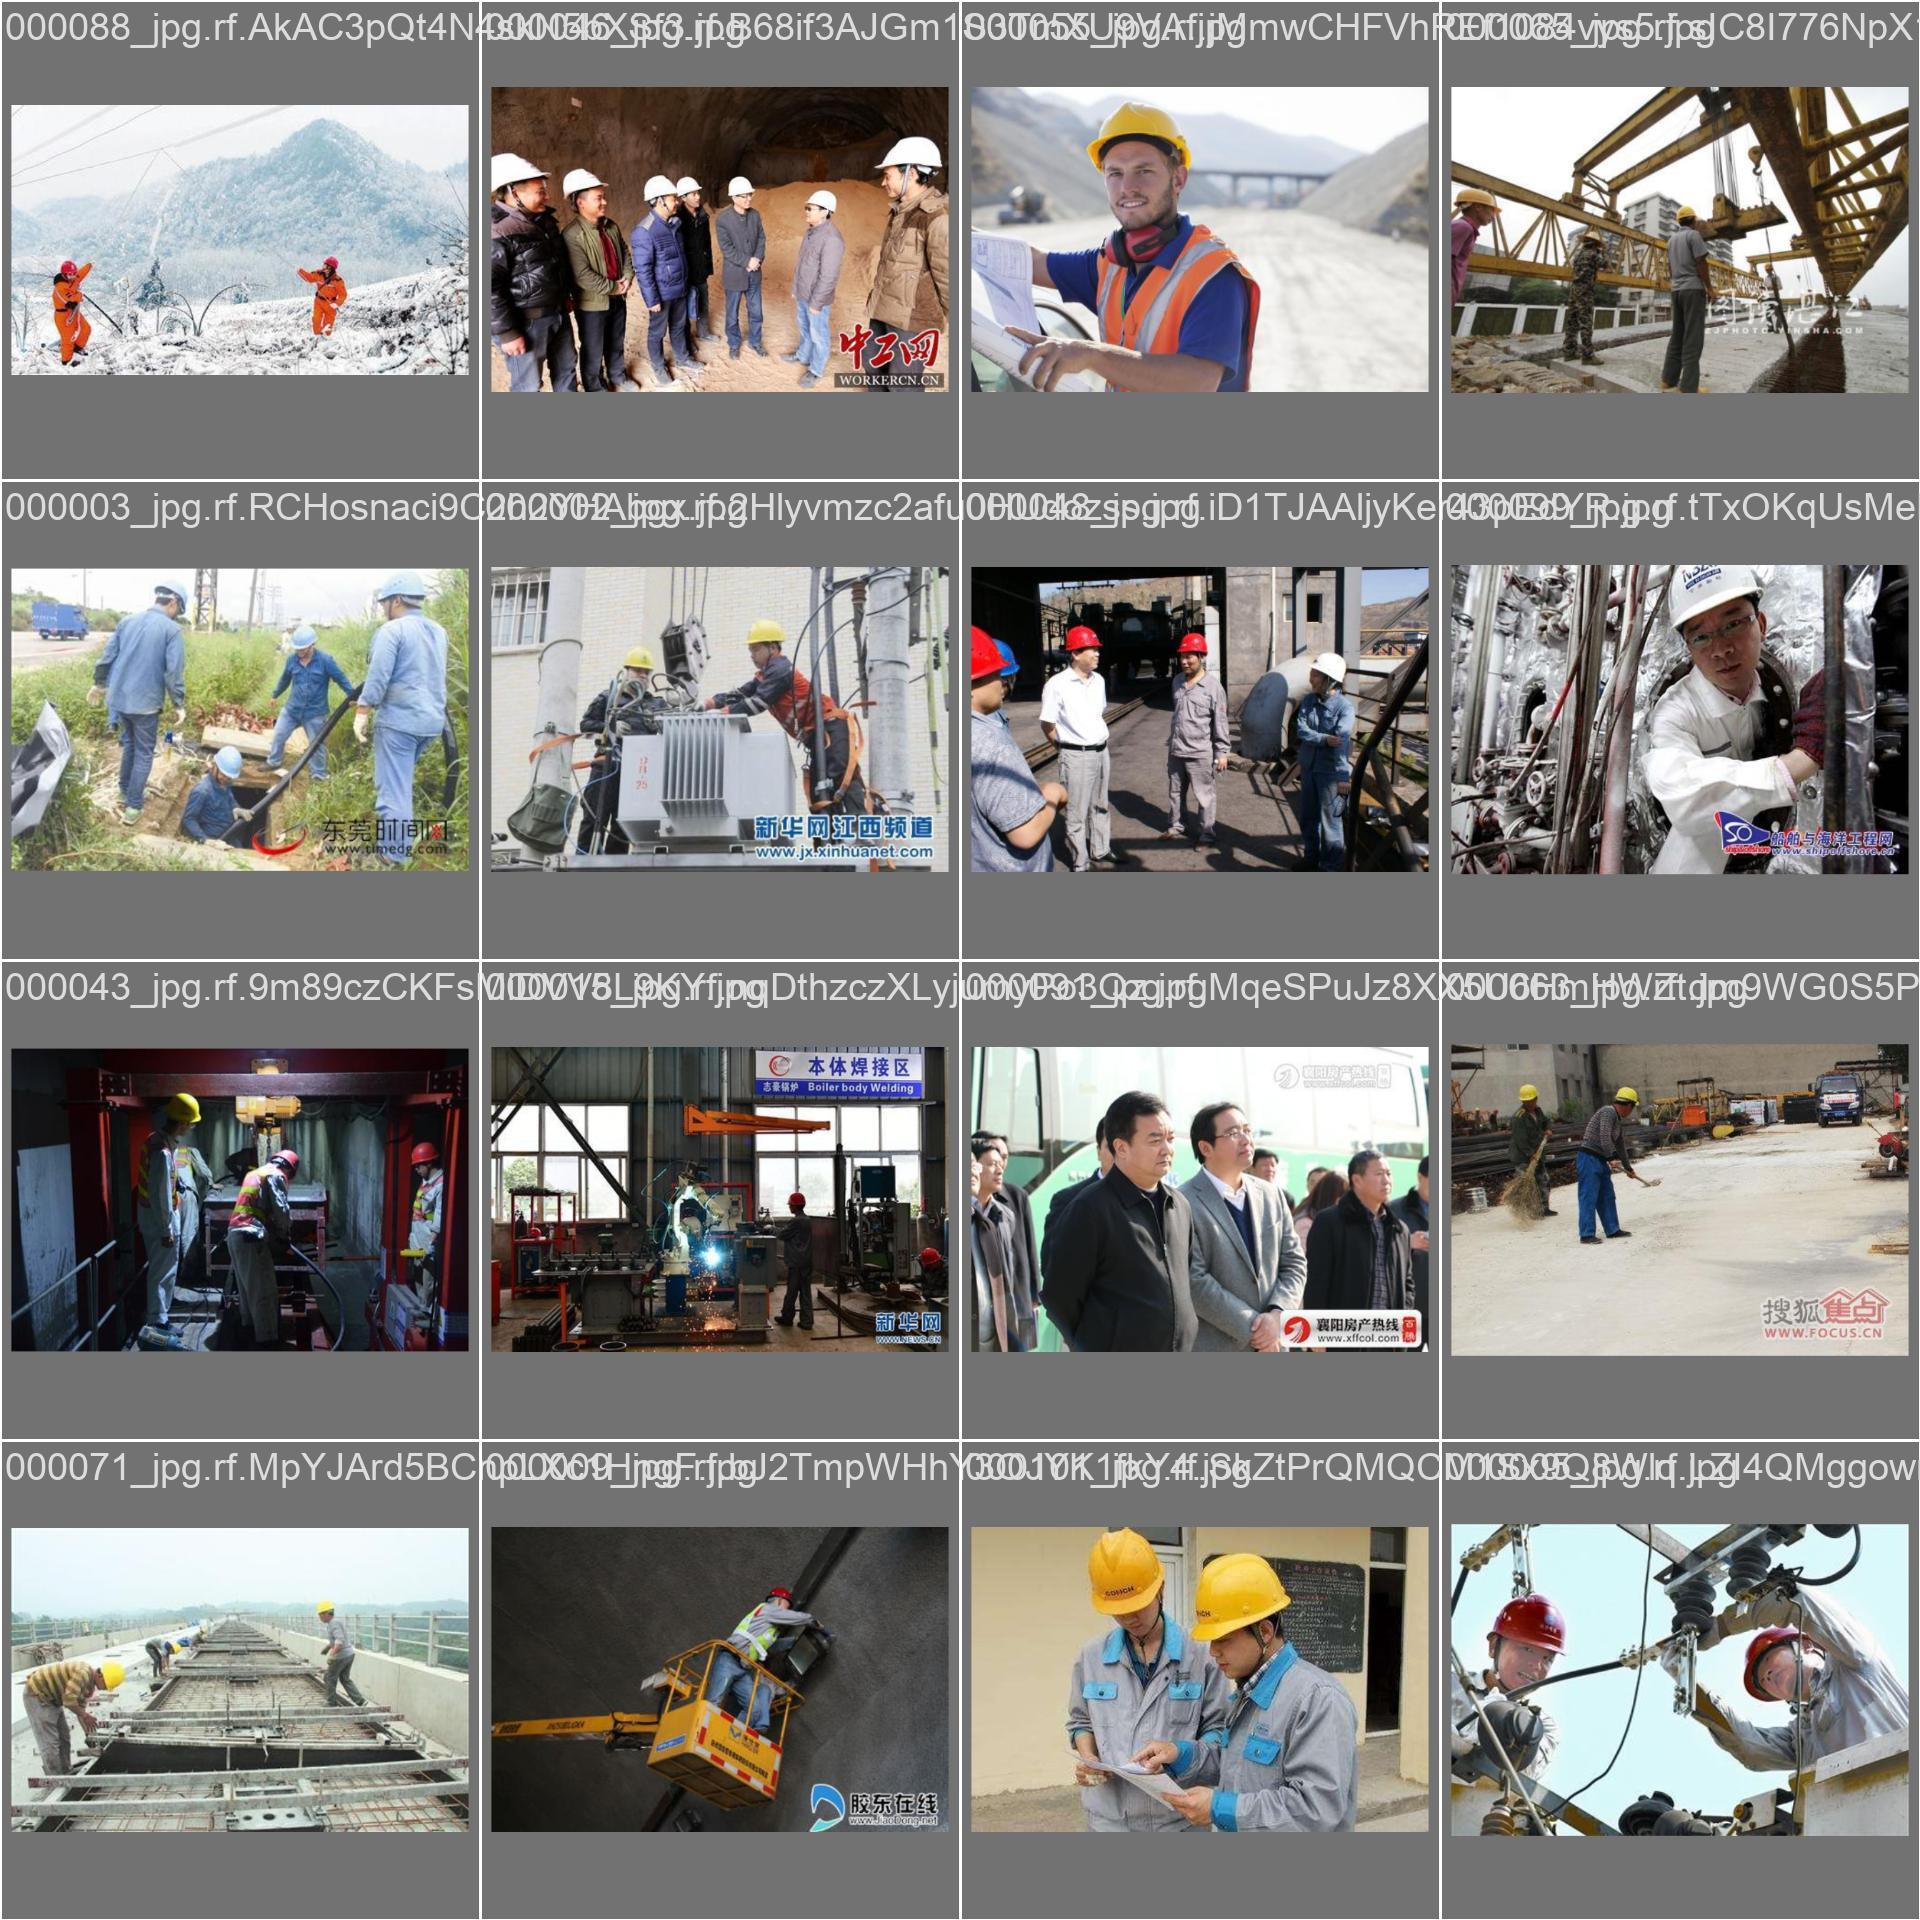

In [12]:
Image(filename=f"{RUNS_FOLDER}/{TRAIN_EXPERIMENT_NAME}/val_batch0_pred.jpg", width=600)

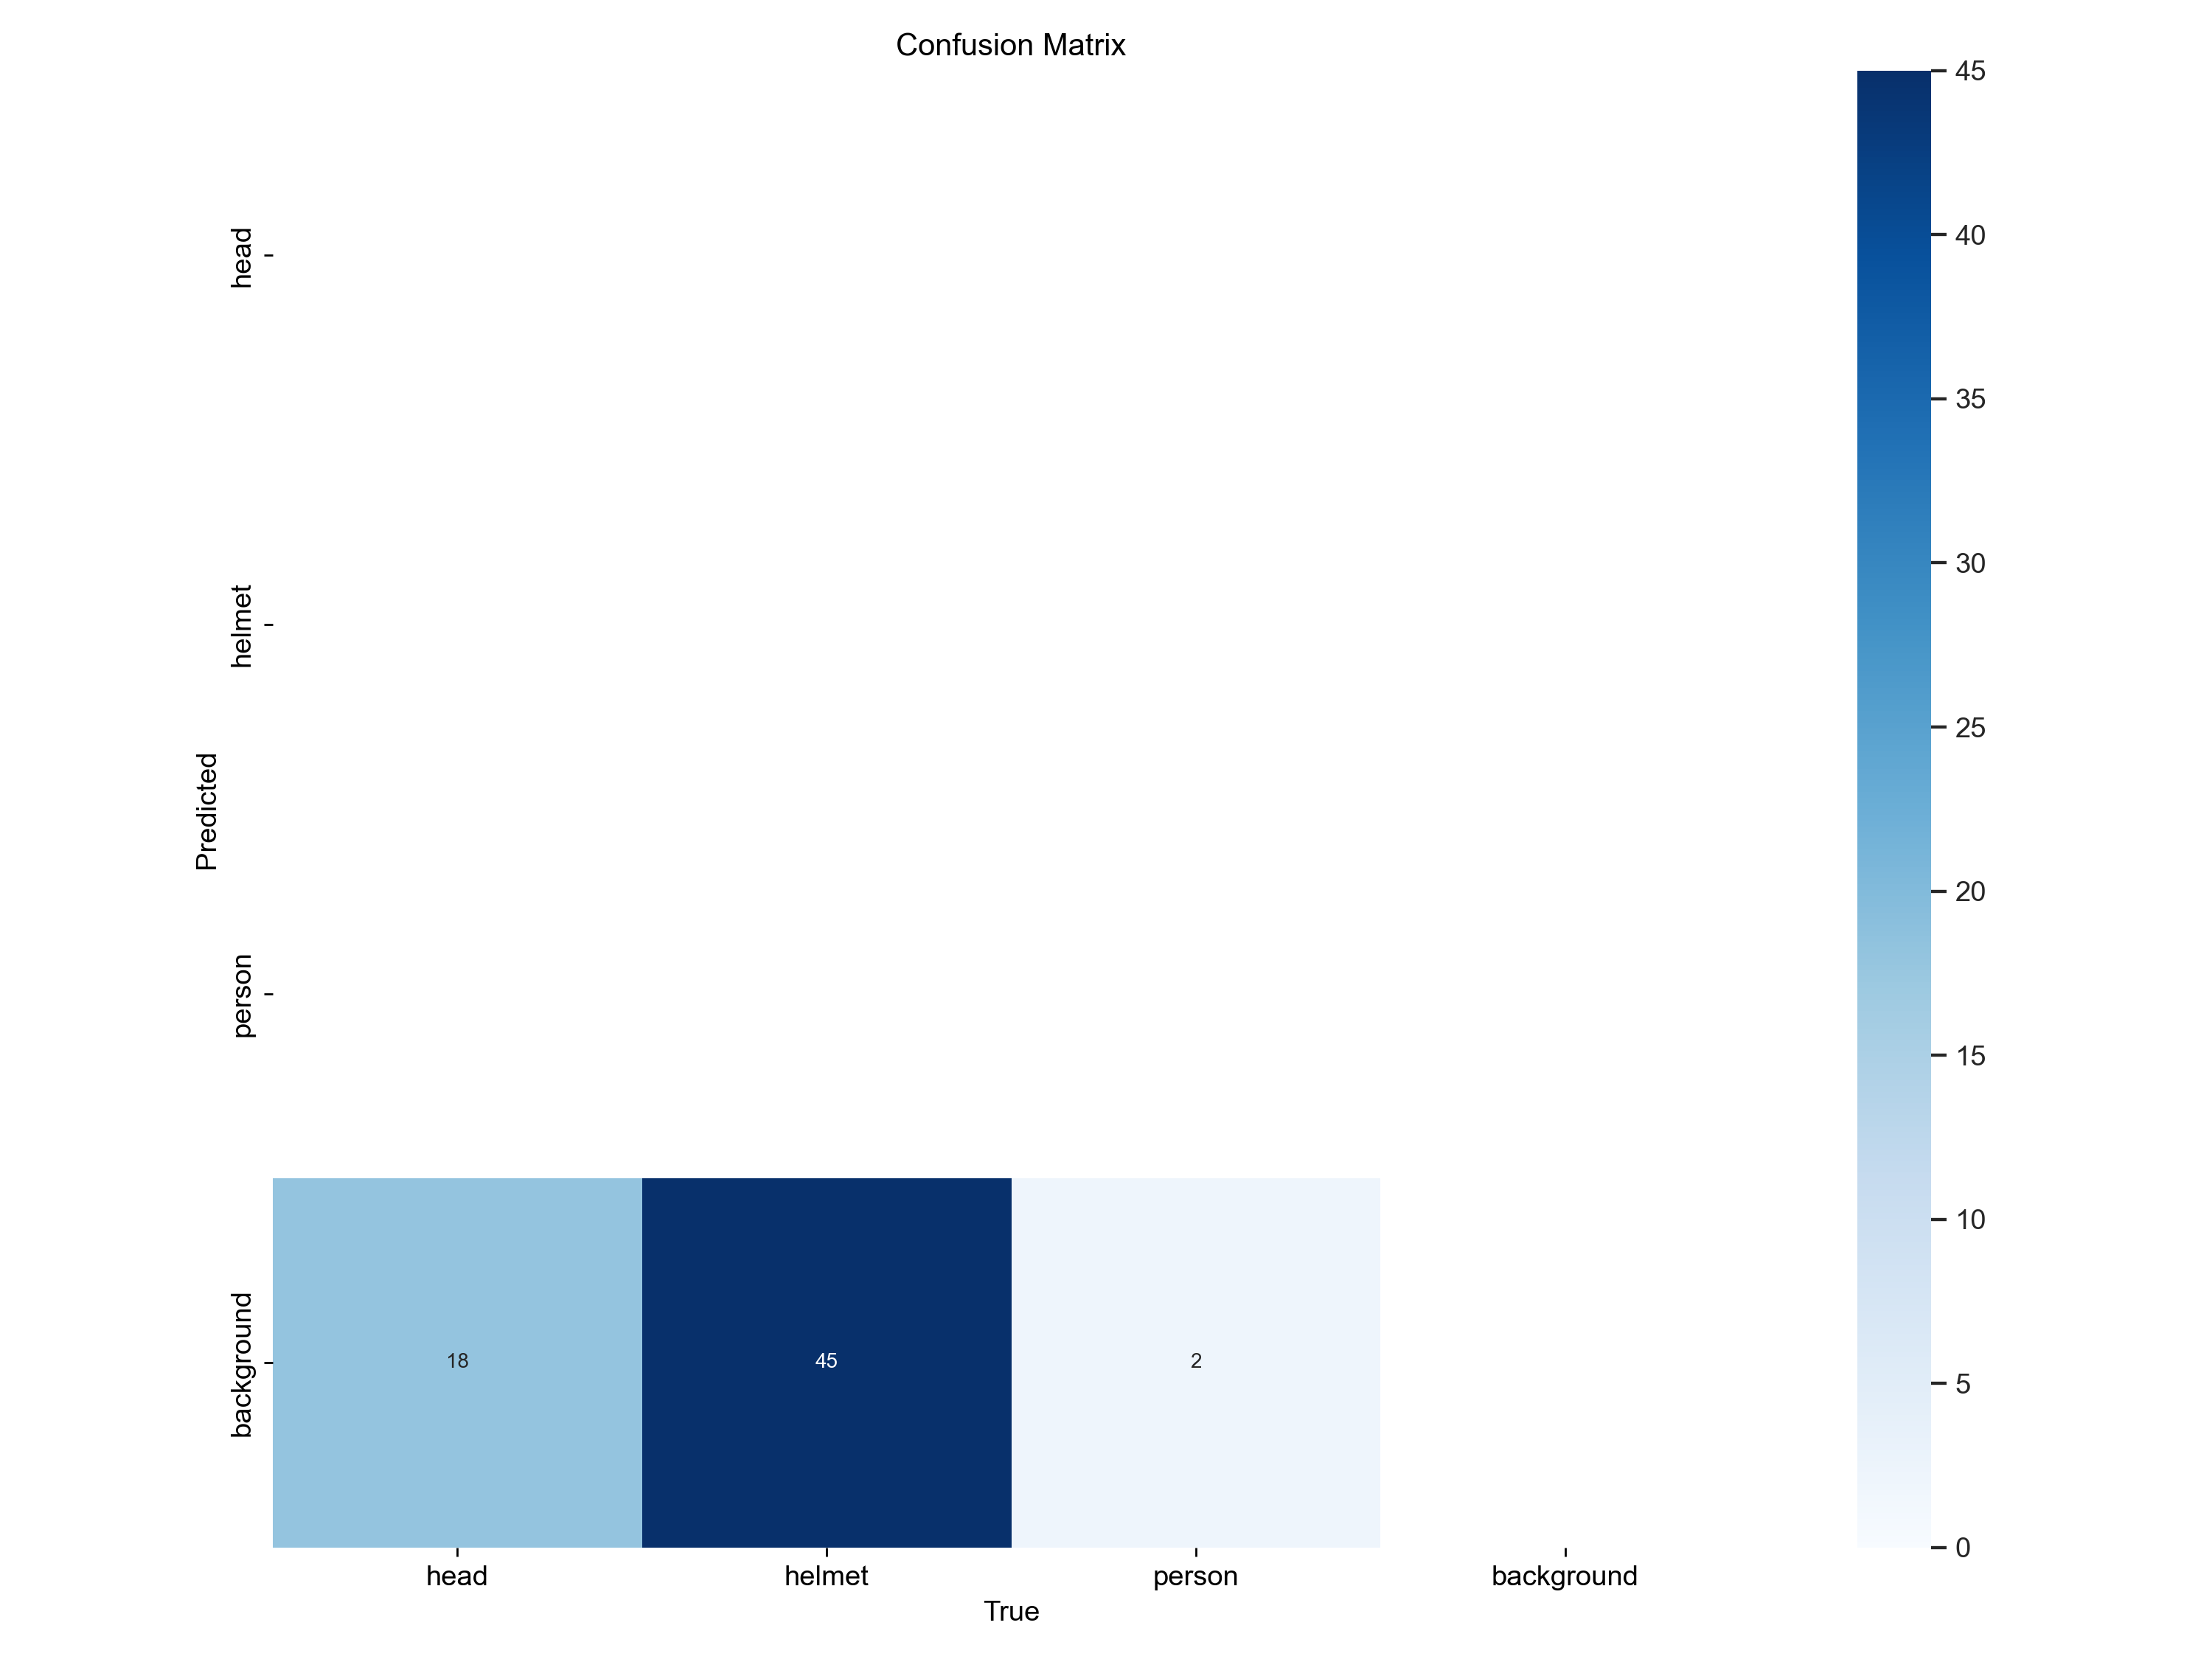

In [13]:
Image(filename=f"{RUNS_FOLDER}/{TRAIN_EXPERIMENT_NAME}/confusion_matrix.png", width=650)

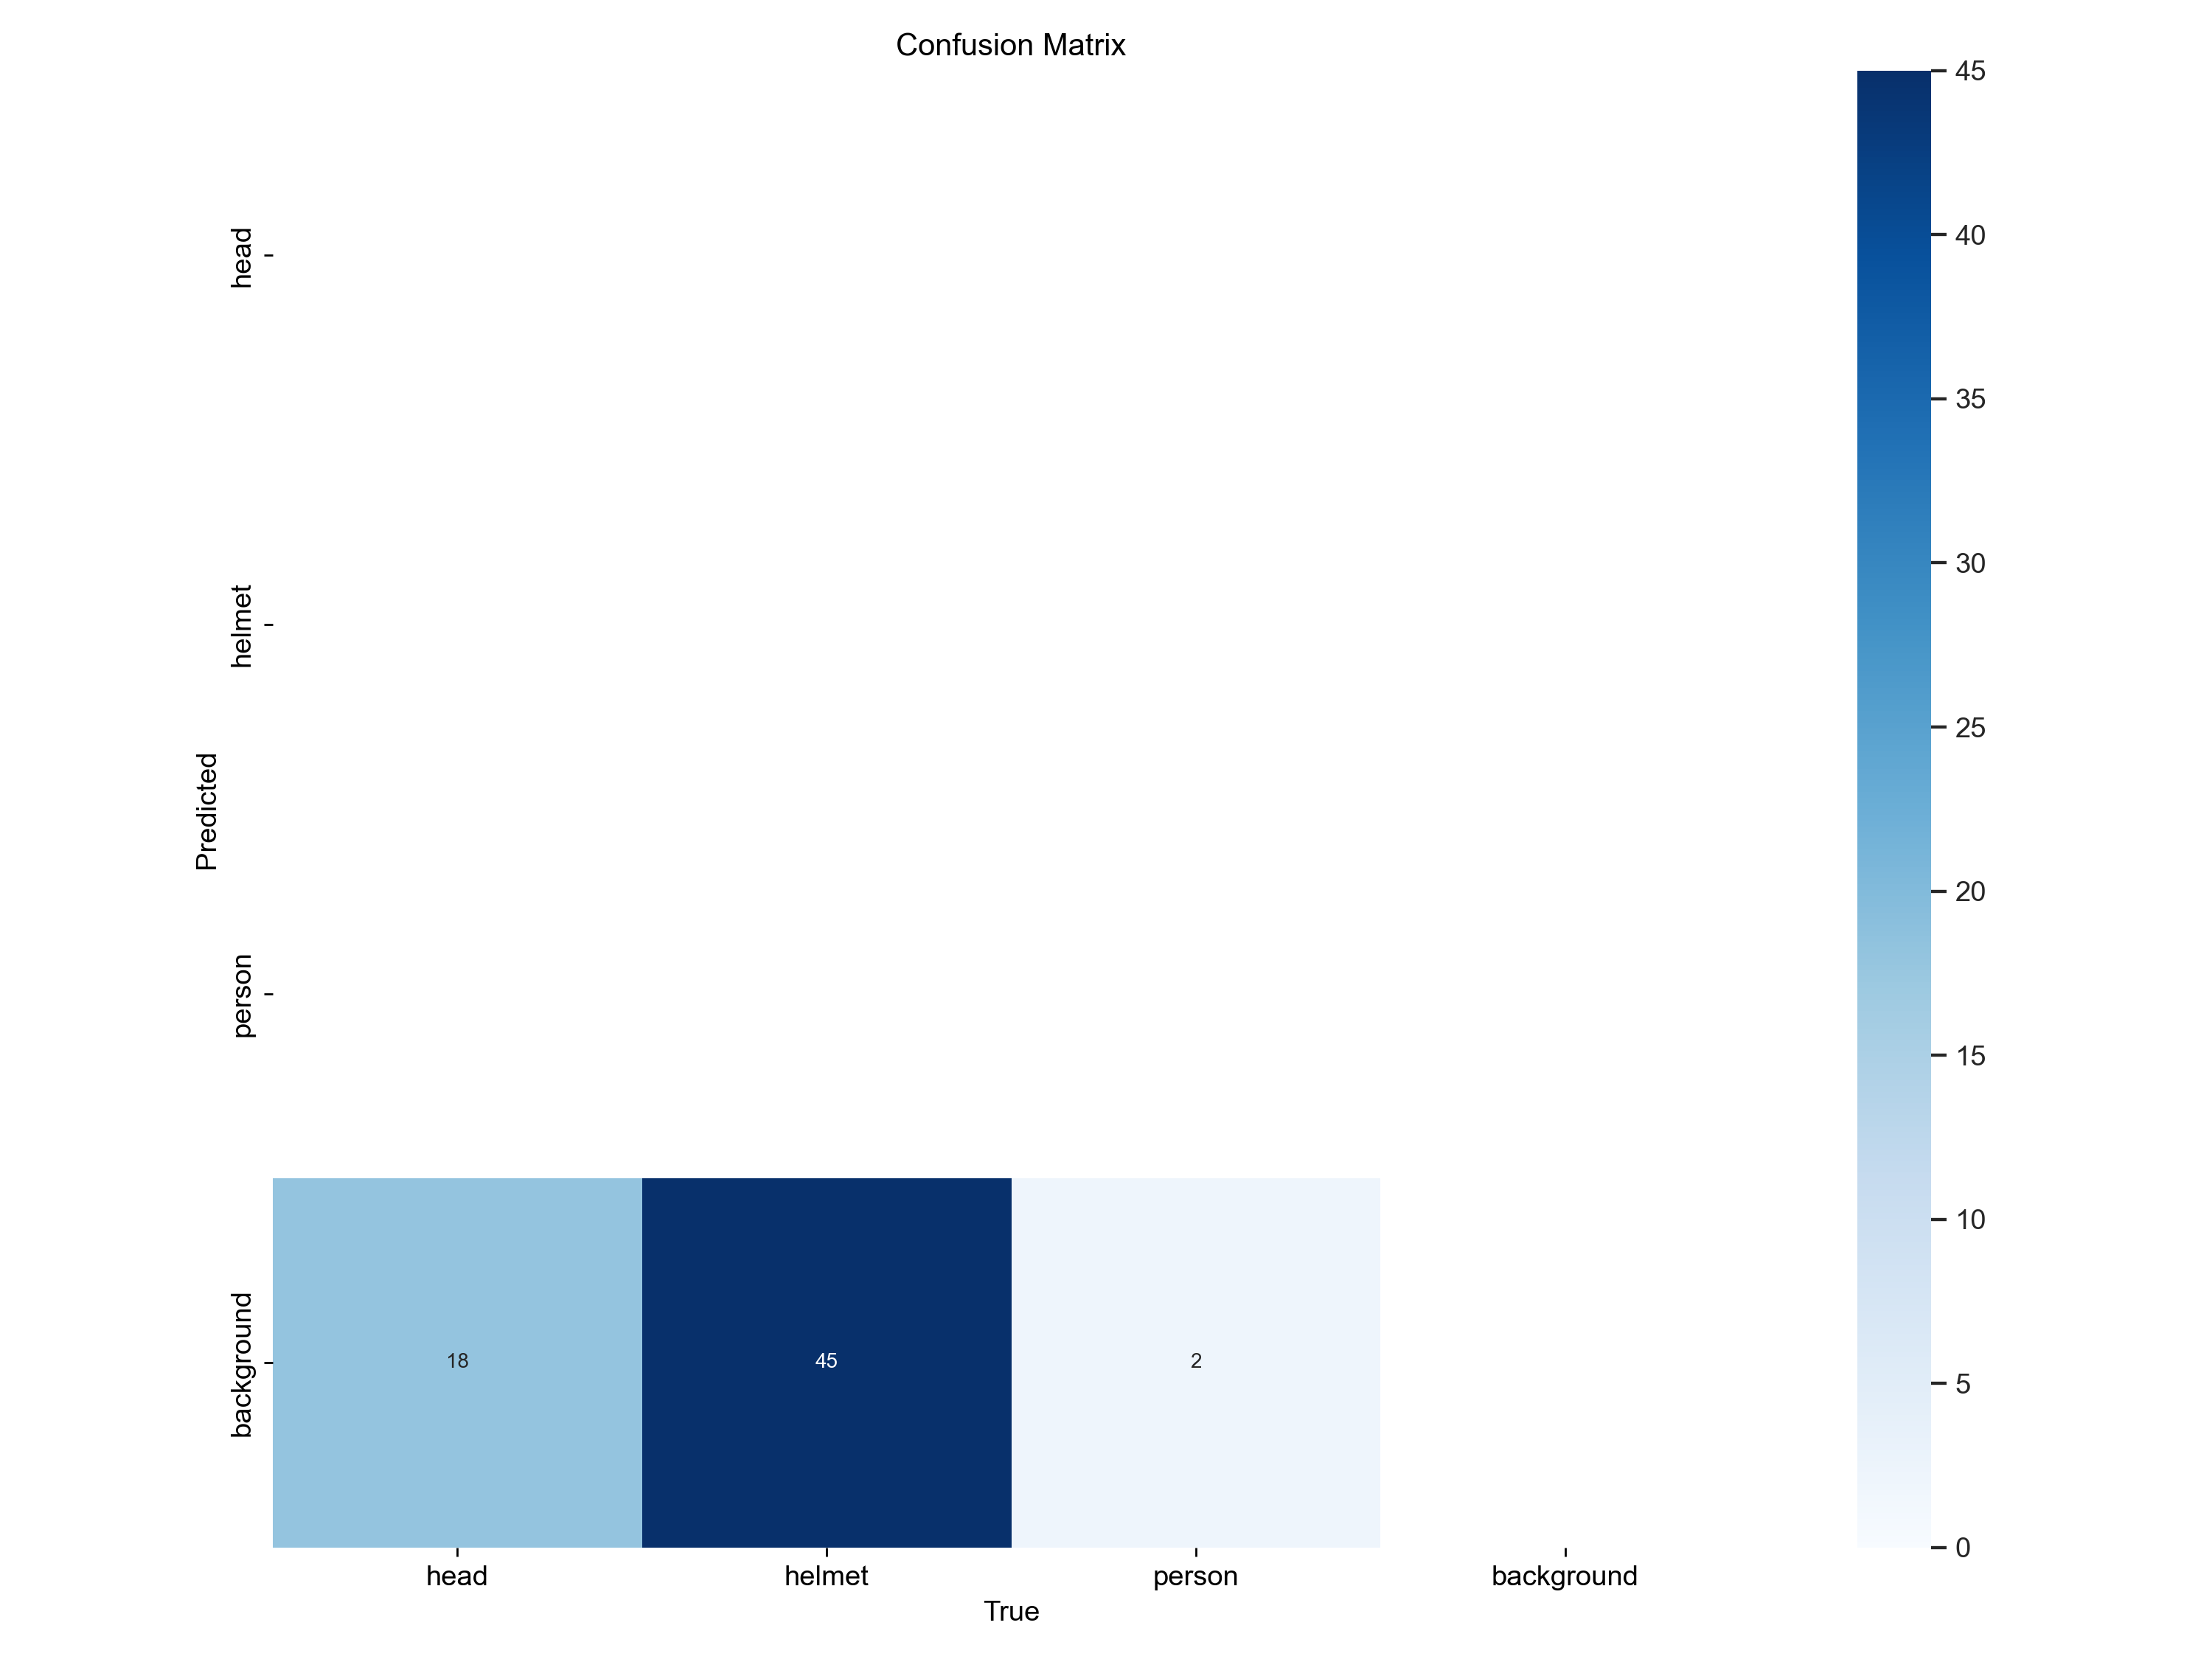

In [14]:
Image(filename=f"{RUNS_FOLDER}/{VAL_EXPERIMENT_NAME}/confusion_matrix.png", width=650)

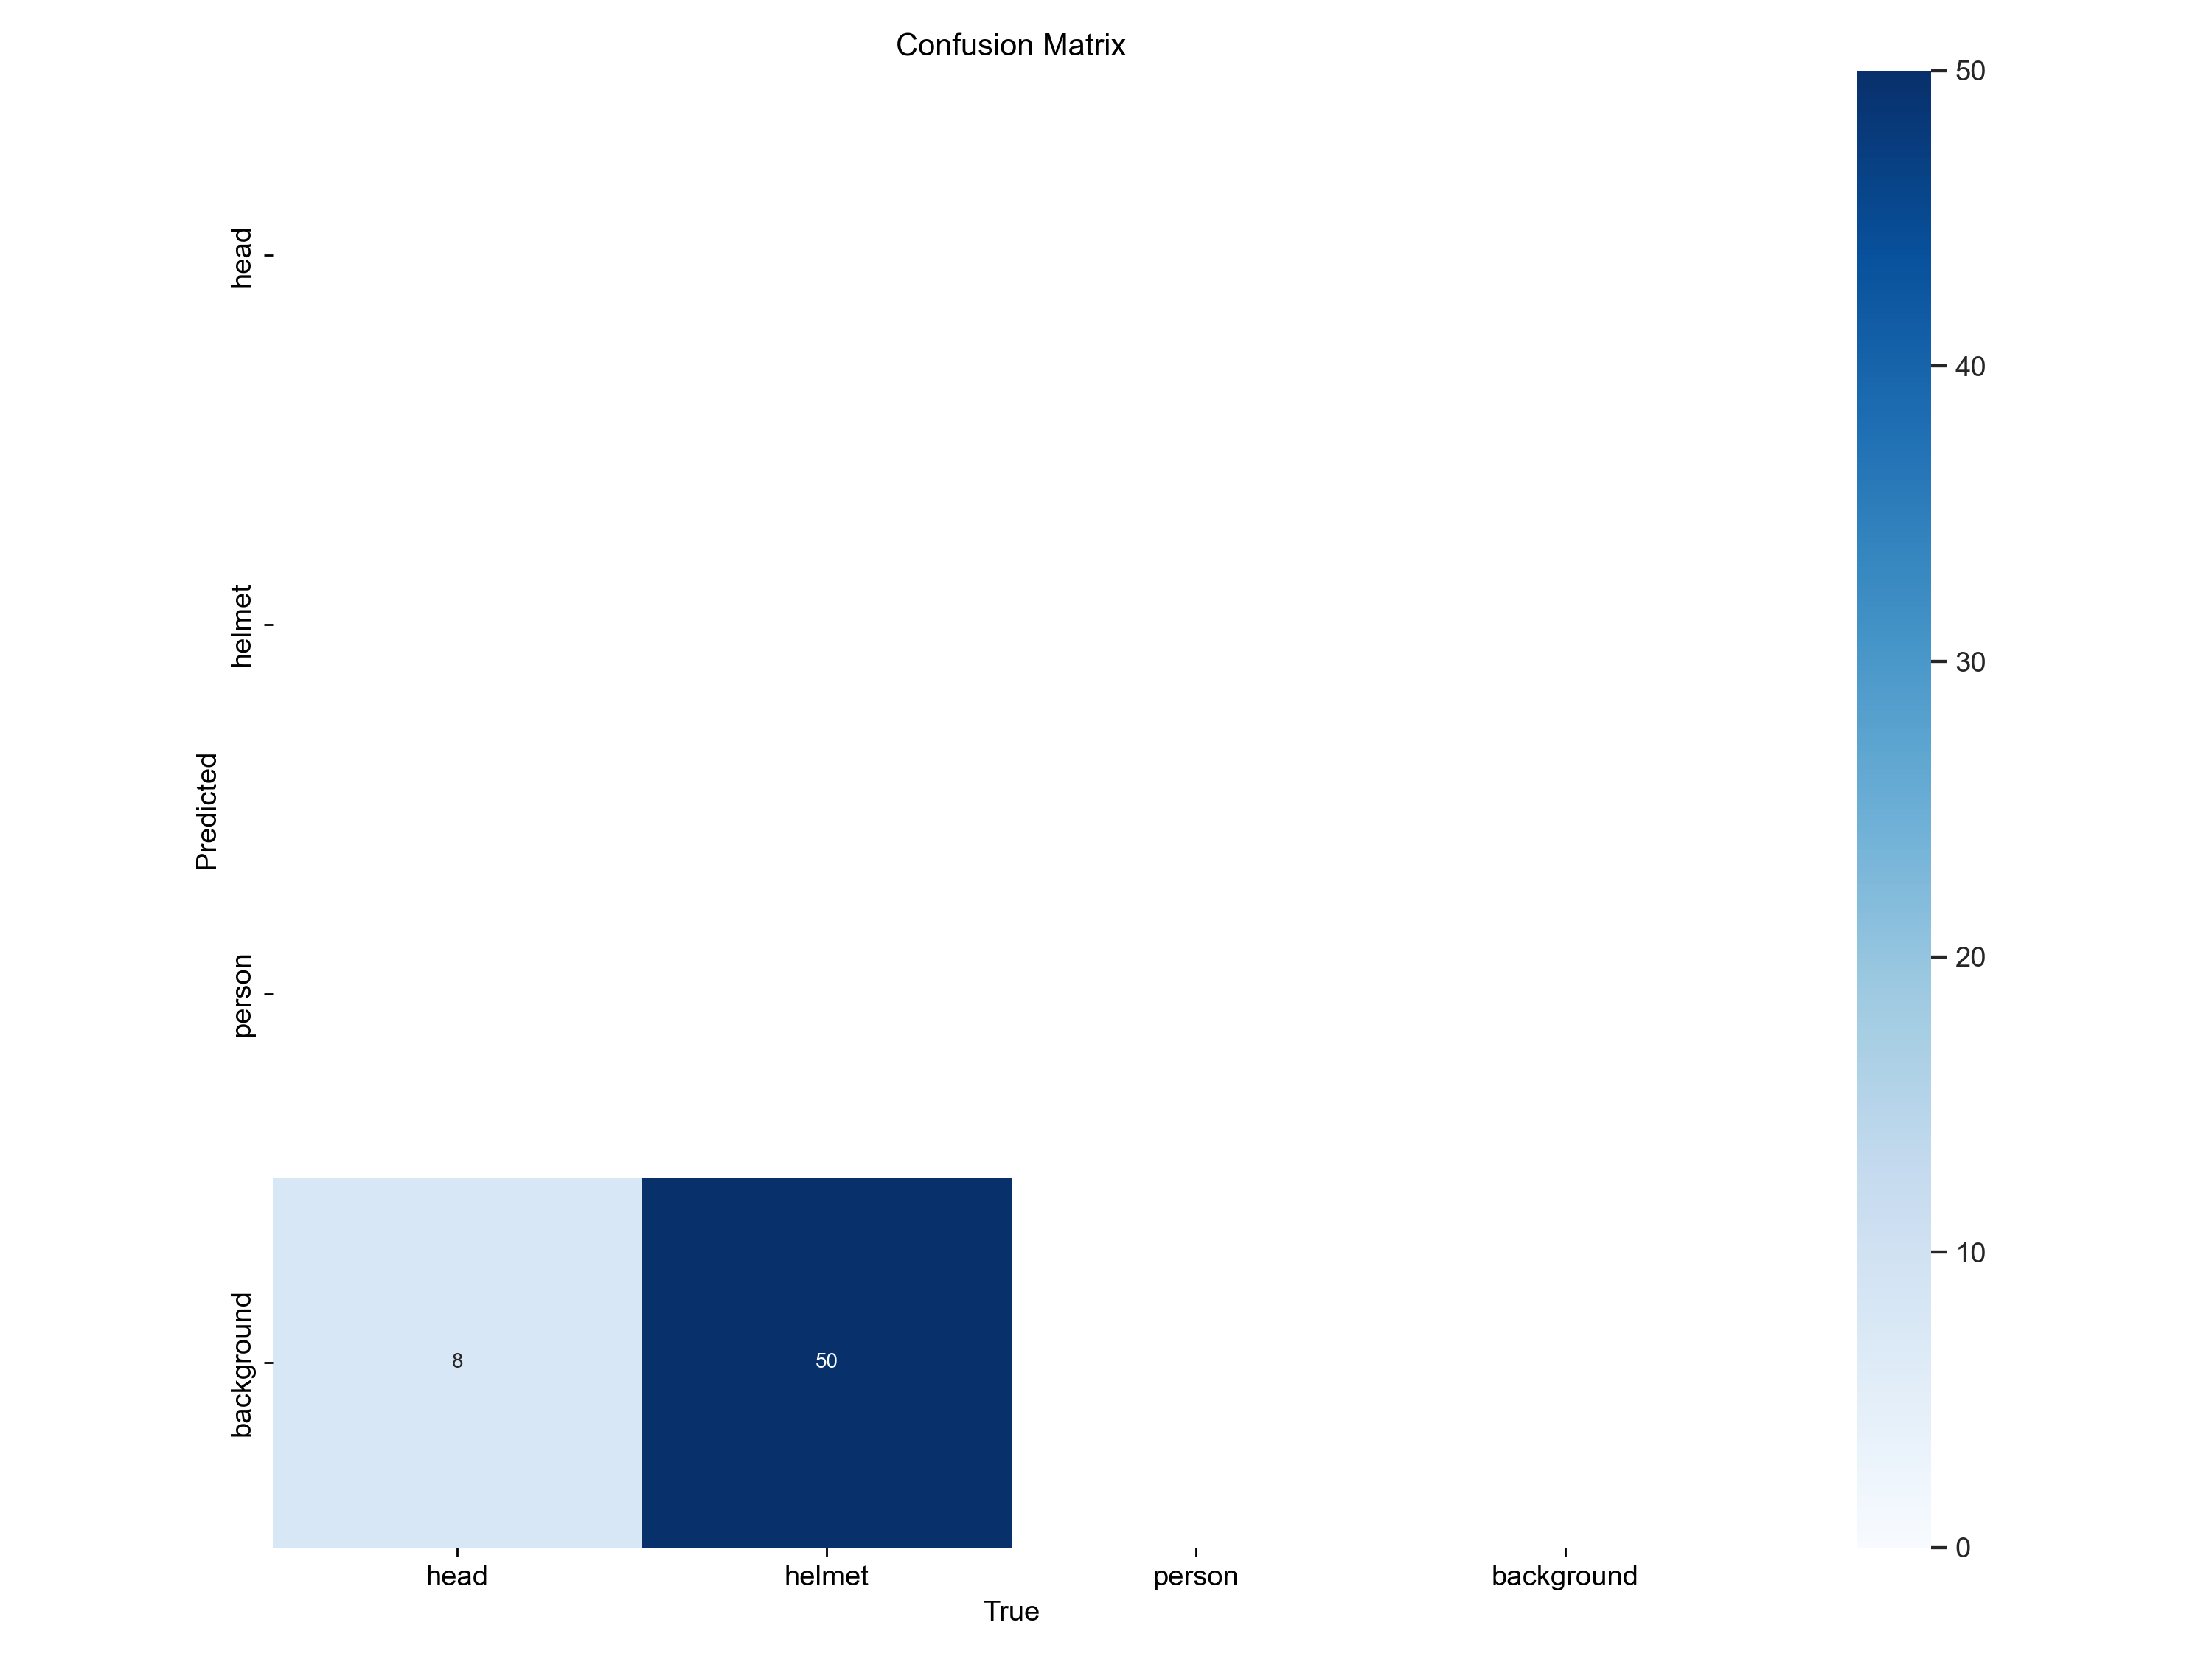

In [15]:
Image(filename=f"{RUNS_FOLDER}/{TEST_EXPERIMENT_NAME}/confusion_matrix.png", width=650)

### Inference

Make predictions with your previously trained model.

In [16]:
import yaml

def get_value_from_yaml(yaml_file, key):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)
        value = data.get(key, "")
        return value

parent_path = get_value_from_yaml(f"data.yaml", "path")

train_path = get_value_from_yaml(f"data.yaml", "train")
val_path = get_value_from_yaml(f"data.yaml", "val")
test_path = get_value_from_yaml(f"data.yaml", "test")

train_source = os.path.join(parent_path, train_path)
val_source = os.path.join(parent_path, val_path)
test_source = os.path.join(parent_path, test_path)

print("Retrieved pathes")
print(f"Train: {train_source}")
print(f"Val: {val_source}")
print(f"Test: {test_source}")

Retrieved pathes
Train: train/images
Val: valid/images
Test: test/images


In [17]:
!yolo task=detect mode=predict model="{TRAINED_MODEL_PATH}" conf=0.25 source="{train_source}" save=True project="{RUNS_FOLDER}" name="{INFERENCE_TRAIN_EXPERIMENT_NAME}"

Ultralytics 8.3.18 рџљЂ Python-3.11.1 torch-2.5.0+cpu CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)
YOLOv8_res_cbam summary: 244 layers, 5,494,753 parameters, 0 gradients, 21.8 GFLOPs

image 1/70 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\train\images\000001_jpg.rf.8UHBRew7ibkE6pjhd0Ii.jpg: 480x640 (no detections), 209.1ms
image 2/70 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\train\images\000007_jpg.rf.1h1V5mYPFiKHngCtWR9w.jpg: 608x640 (no detections), 215.2ms
image 3/70 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\train\images\000012_jpg.rf.fXv970duXYWTsfbE567F.jpg: 448x640 (no detections), 165.2ms
image 4/70 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\train\images\000013_jpg.rf.9zqZRmnCbL0b3OS7mQEO.jpg: 512x640 (no detections), 183.4ms
image 5/70 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\train\images\000014_jpg.rf.tqw042Gq93csBs6vDAkV.jpg: 640x544 (no detections), 195.3ms
image 6/70 C:\Users\admin\PycharmProjects\ul

In [18]:
!yolo task=detect mode=predict model="{TRAINED_MODEL_PATH}" conf=0.25 source="{val_source}" save=True project="{RUNS_FOLDER}" name="{INFERENCE_VAL_EXPERIMENT_NAME}"

Ultralytics 8.3.18 рџљЂ Python-3.11.1 torch-2.5.0+cpu CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)
YOLOv8_res_cbam summary: 244 layers, 5,494,753 parameters, 0 gradients, 21.8 GFLOPs

image 1/20 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\valid\images\000002_jpg.rf.2Hlyvmzc2afu0HUdozss.jpg: 448x640 (no detections), 229.4ms
image 2/20 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\valid\images\000003_jpg.rf.RCHosnaci9C2h2YHAbgx.jpg: 448x640 (no detections), 203.7ms
image 3/20 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\valid\images\000004_jpg.rf.hDE4LbhH8tUtvf8GrVxm.jpg: 480x640 (no detections), 188.0ms
image 4/20 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\valid\images\000005_jpg.rf.LZI4QMggowrVFJD1TCNq.jpg: 448x640 (no detections), 150.9ms
image 5/20 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\valid\images\000006_jpg.rf.XHJzBIzksqcmIeibnQCC.jpg: 640x480 (no detections), 180.8ms
image 6/20 C:\Users\admin\PycharmProjects\ul

In [19]:
!yolo task=detect mode=predict model="{TRAINED_MODEL_PATH}" conf=0.25 source="{test_source}" save=True project="{RUNS_FOLDER}" name="{INFERENCE_TEST_EXPERIMENT_NAME}"

Ultralytics 8.3.18 рџљЂ Python-3.11.1 torch-2.5.0+cpu CPU (AMD Ryzen 7 3750H with Radeon Vega Mobile Gfx)
YOLOv8_res_cbam summary: 244 layers, 5,494,753 parameters, 0 gradients, 21.8 GFLOPs

image 1/10 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\test\images\000008_jpg.rf.NiLCeQwQcp8G4yXDSVUZ.jpg: 640x480 (no detections), 209.7ms
image 2/10 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\test\images\000011_jpg.rf.eZvzz1r2NqflwDqHTtie.jpg: 480x640 (no detections), 174.3ms
image 3/10 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\test\images\000034_jpg.rf.fByt3YoLWQesDcSGoDJA.jpg: 448x640 (no detections), 175.4ms
image 4/10 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\test\images\000047_jpg.rf.8H1eaLCWN8A12r3OGRWl.jpg: 416x640 (no detections), 163.8ms
image 5/10 C:\Users\admin\PycharmProjects\ultralytics\test_dataset\test\images\000054_jpg.rf.sO6cT7hHLtuXZXWljLLc.jpg: 448x640 (no detections), 149.7ms
image 6/10 C:\Users\admin\PycharmProjects\ultraly

**NOTE:** Let's take a look at few results.

In [20]:
def display_detected(path_to_pred_dir, predictions_to_display=5, display_width=600):
  for image_path in glob.glob(f'{path_to_pred_dir}/*.jpg')[:predictions_to_display]:
      display(Image(filename=image_path, width=display_width))
      print("\n")

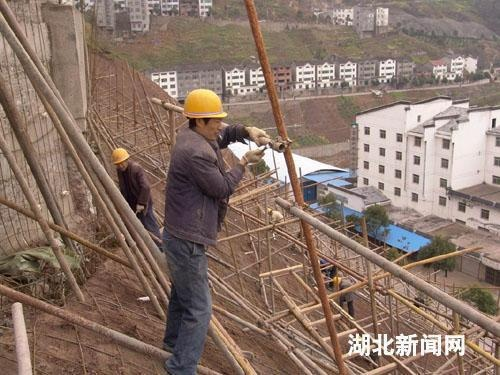

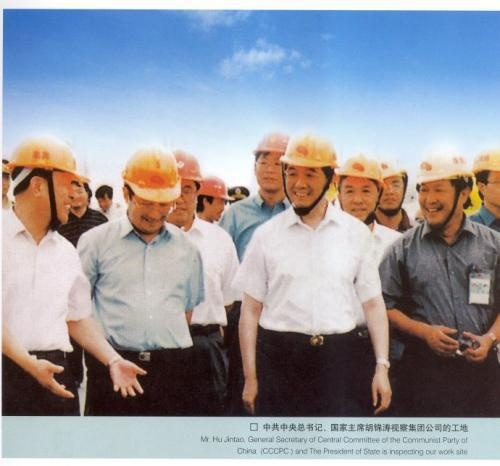

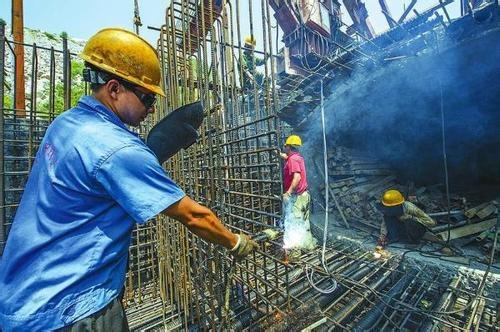

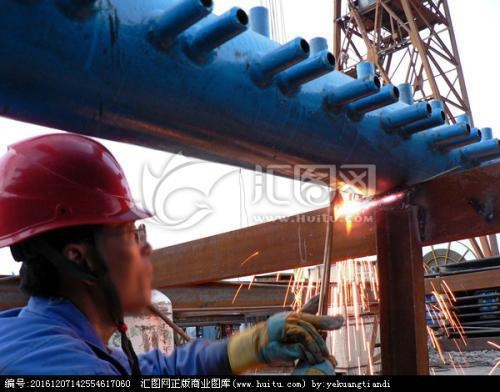

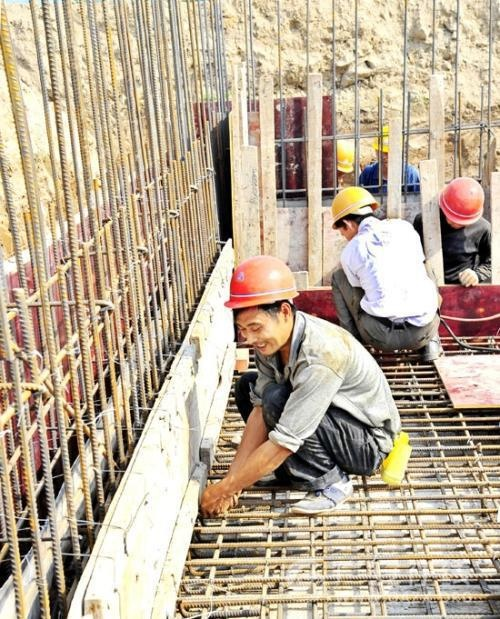

In [21]:
display_detected(f"{TRAIN_PREDICTIONS_PATH}")

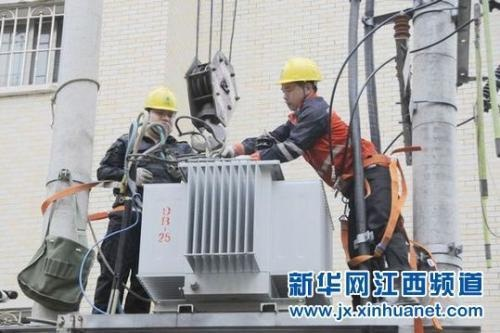

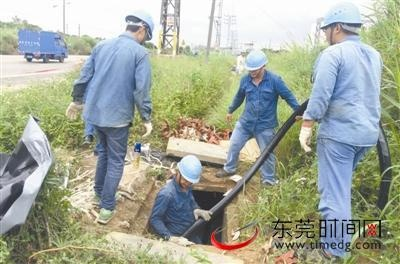

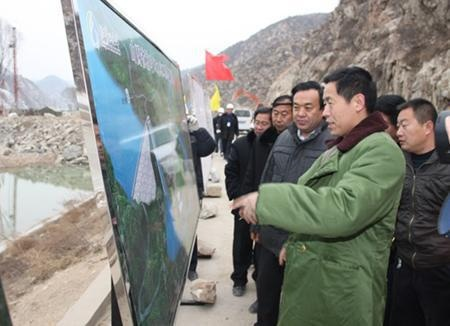

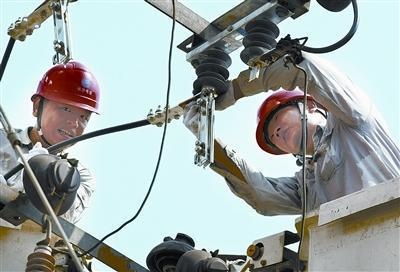

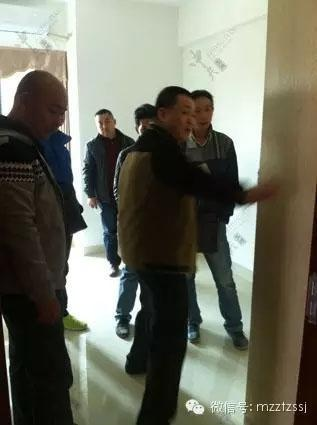

In [22]:
display_detected(display_detected(f"{VAL_PREDICTIONS_PATH}"))

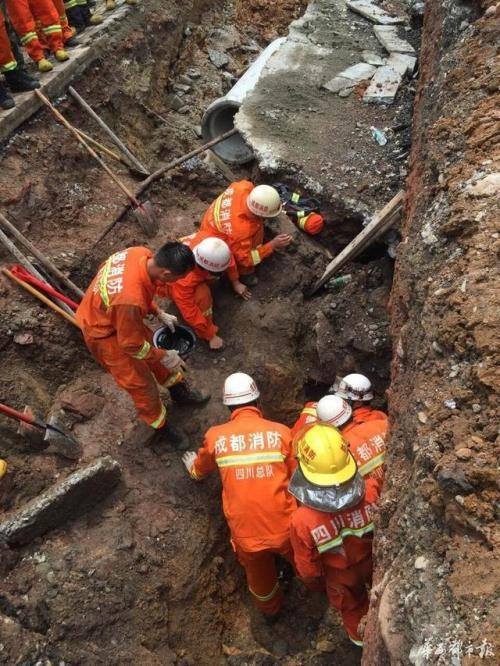

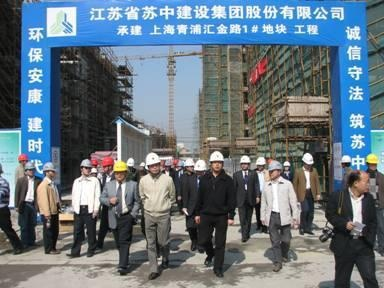

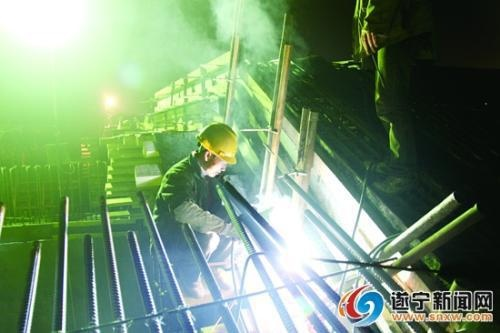

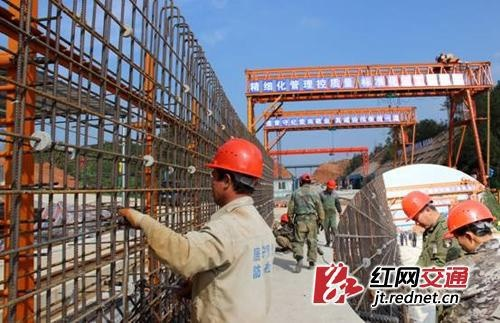

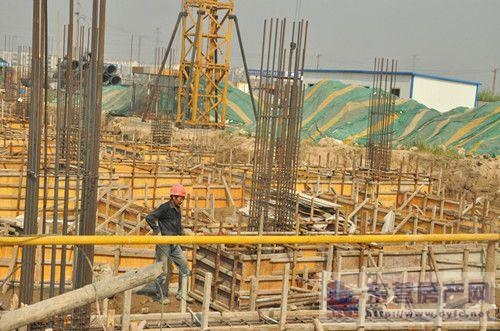

In [23]:
display_detected(display_detected(f"{TEST_PREDICTIONS_PATH}"))

You may uncomment below cell if you use python 3.10 in order to make sure you will be able to convert model to onnx format.

In [24]:
# !yolo export model="{TRAINED_MODEL_PATH}" imgsz="{IMAGE_SIZE}" format="{FORMAT}" project="{RUNS_FOLDER}" name="{EXPORT_EXPERIMENT_NAME}" opset=18 